## EDA

### 1.  Imports and Load Cleaned Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Setup ---
# Set a consistent style for all our plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Set default figure size

# --- Load Data ---
# Load the cleaned data from the 'processed' folder
file_path = '../data/processed/cleaned_loan_data.csv'
try:
    df = pd.read_csv(file_path)
    print("Cleaned data loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: The file {file_path} was not found. Please run the first notebook to generate it.")

df.head()

Cleaned data loaded successfully.


,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,...,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,41
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,40
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,48
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,37
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,31


#### 2. Statistical Description

In [2]:
# --- Statistical Summary ---
print("Statistical Description of Numerical Variables:")
# .T transposes the output to make it easier to read
df.describe().T

Statistical Description of Numerical Variables:


,count,mean,std,min,25%,50%,75%,max
uniqueid,233154.0,535917.573376,6.831569e+04,417428.00,476786.25,535978.5,595039.75,6.710840e+05
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
branch_id,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
supplier_id,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
current_pincode_id,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
state_id,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
employee_code_id,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03


### 3. Target Variable Distribution

C:\Users\ThapeloMasebe\AppData\Local\Temp\ipykernel_16100\3021288222.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='loan_default', data=df, palette=['#43a047', '#e53935'])


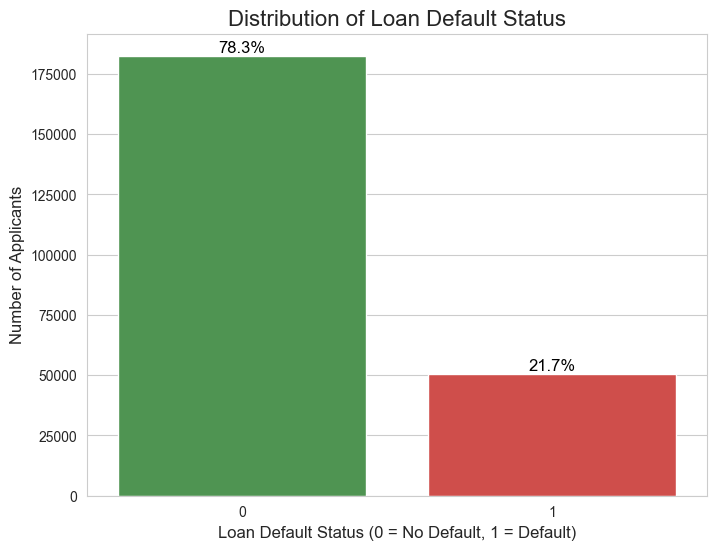

Overall Default Rate: 21.71%


In [4]:
# --- Target Variable Analysis ---
plt.figure(figsize=(8, 6))
plt.title('Distribution of Loan Default Status', fontsize=16)

# Create the count plot
ax = sns.countplot(x='loan_default', data=df, palette=['#43a047', '#e53935'])

# Add labels and annotations
plt.xlabel('Loan Default Status (0 = No Default, 1 = Default)', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)

# Calculate and display the percentage on the bars
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, color='black')

# --- SAVE THE FIGURE ---
# This line saves the plot to the specified file before displaying it.
plt.savefig('../reports/figures/target_variable_distribution.png', bbox_inches='tight')

plt.show()

# Print the exact default rate
default_rate = df['loan_default'].value_counts(normalize=True).loc[1] * 100
print(f"Overall Default Rate: {default_rate:.2f}%")

### 4. Default Rate Across Categories

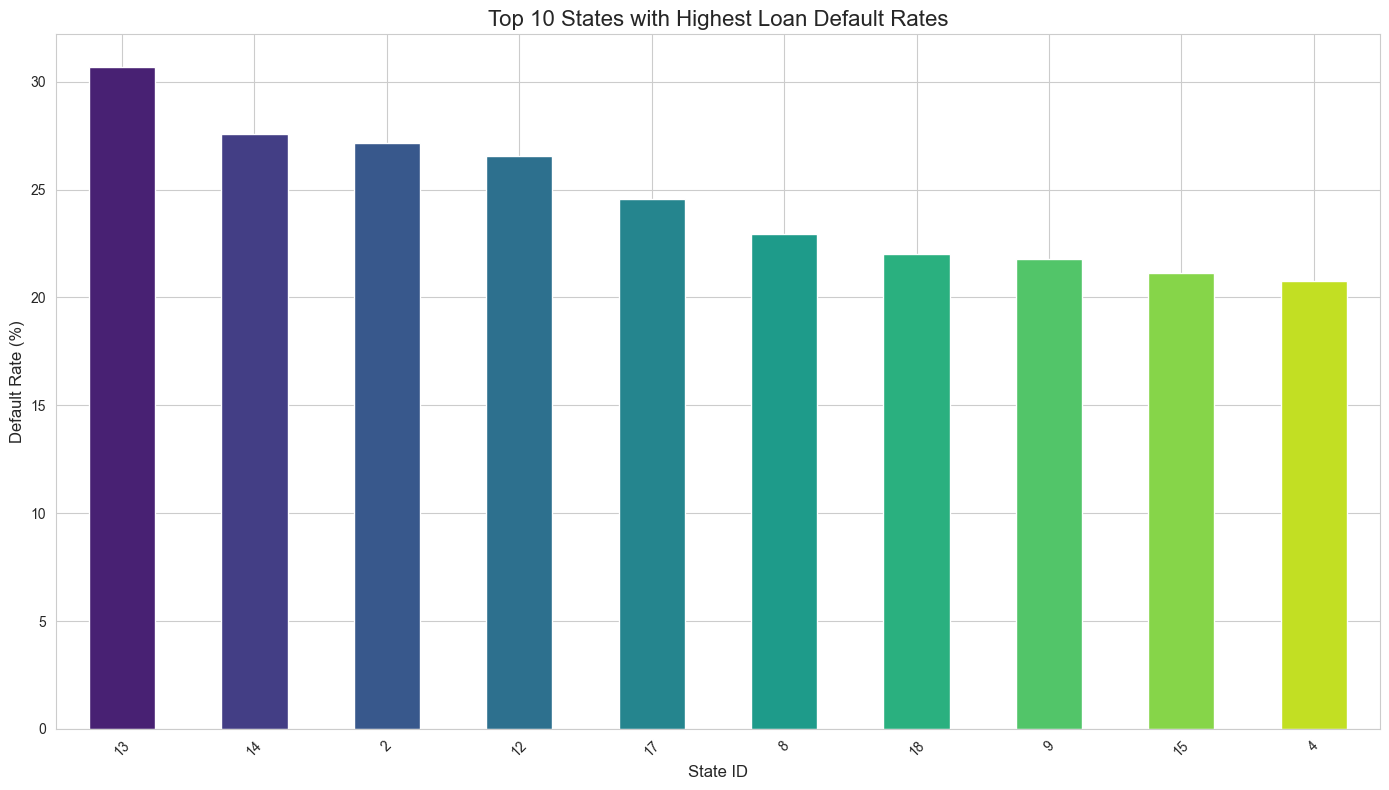

In [5]:
# Calculate the default rate for each state
state_default_rate = df.groupby('state_id')['loan_default'].mean().sort_values(ascending=False) * 100

# Plot the top 10 states with the highest default rates
plt.figure(figsize=(14, 8))
state_default_rate.head(10).plot(kind='bar', color=sns.color_palette("viridis", 10))
plt.title('Top 10 States with Highest Loan Default Rates', fontsize=16)
plt.xlabel('State ID', fontsize=12)
plt.ylabel('Default Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping

# --- SAVE THE FIGURE ---
plt.savefig('../reports/figures/top10_states_by_default_rate.png', bbox_inches='tight')

plt.show()

### 5.  Employment Type and Defaulting

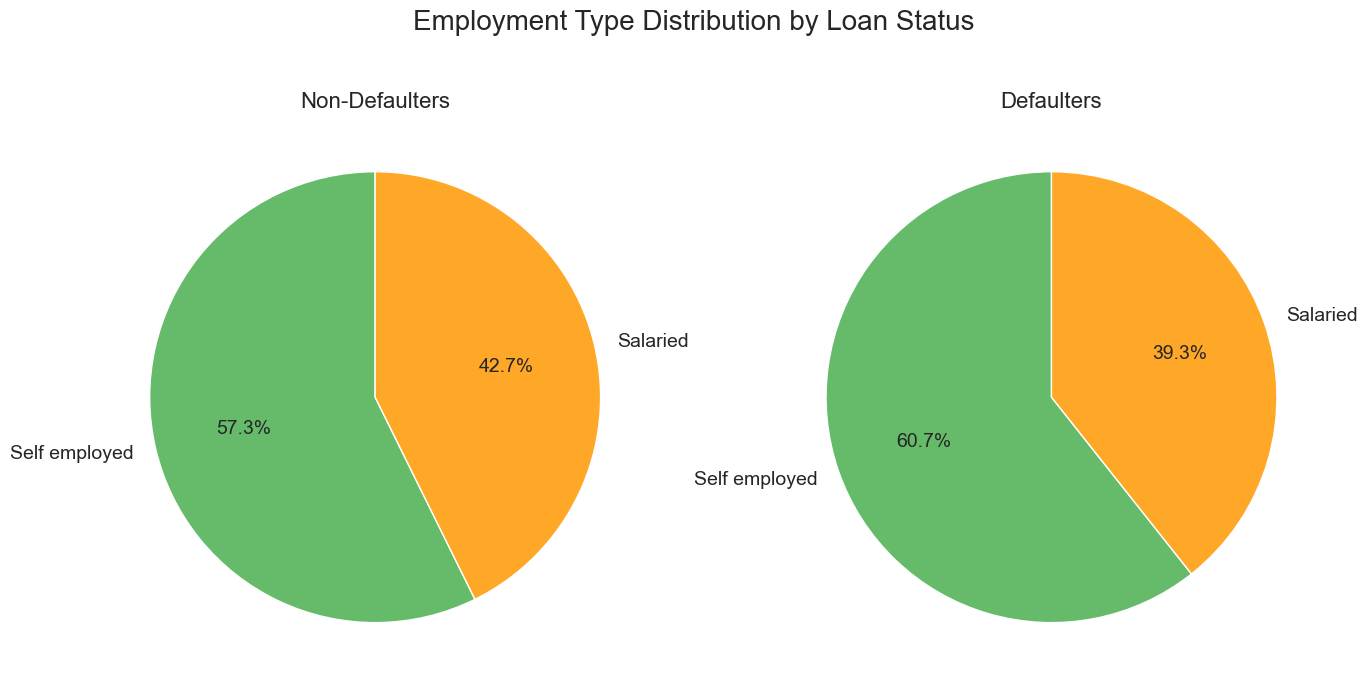

In [6]:
# --- Employment Type vs. Default Status ---
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plt.suptitle('Employment Type Distribution by Loan Status', fontsize=20)

# Pie chart for Non-Defaulters (loan_default = 0)
df[df['loan_default'] == 0]['employment_type'].value_counts().plot.pie(
autopct='%1.1f%%', ax=axes[0], startangle=90,
colors=['#66bb6a', '#ffa726'], textprops={'fontsize': 14}
)
axes[0].set_title('Non-Defaulters', fontsize=16)
axes[0].set_ylabel('') # Hide the y-label

# Pie chart for Defaulters (loan_default = 1)
df[df['loan_default'] == 1]['employment_type'].value_counts().plot.pie(
autopct='%1.1f%%', ax=axes[1], startangle=90,
colors=['#66bb6a', '#ffa726'], textprops={'fontsize': 14}
)
axes[1].set_title('Defaulters', fontsize=16)
axes[1].set_ylabel('') # Hide the y-label

# --- SAVE THE FIGURE ---
plt.savefig('../reports/figures/employment_type_pie_charts.png', bbox_inches='tight')

plt.show()

### 6.  Age and Defaulting

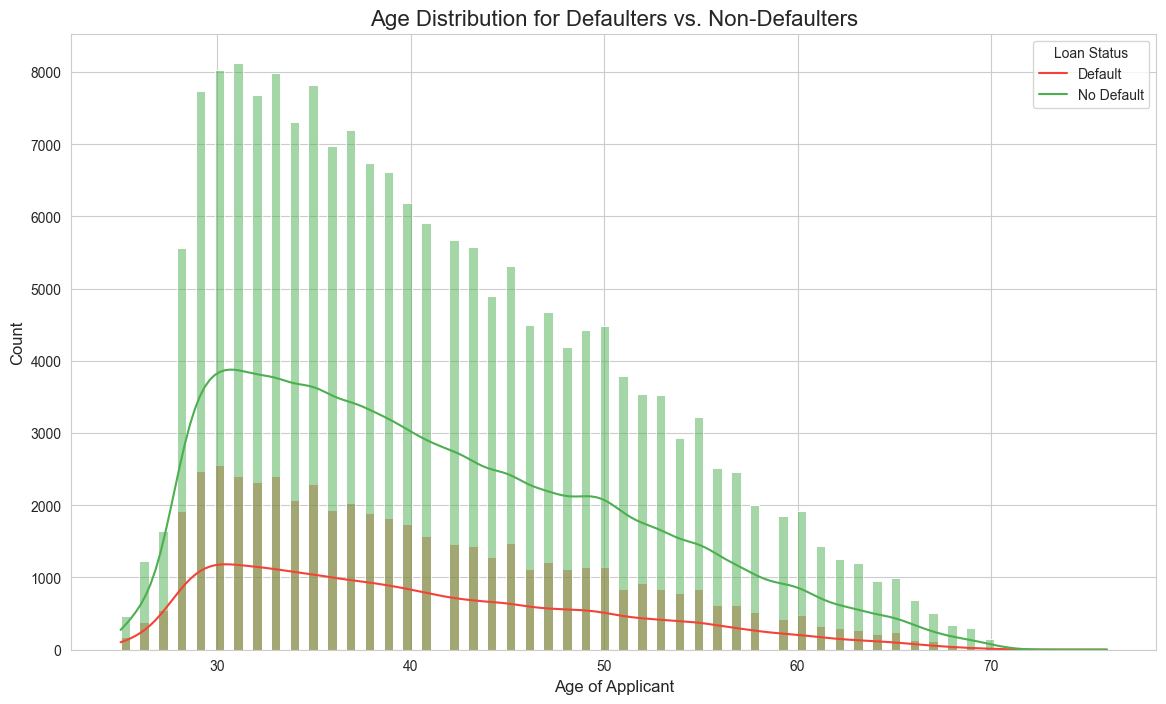

In [7]:
# --- Age Distribution by Default Status ---
plt.figure(figsize=(14, 8))
# Use a histogram with a Kernel Density Estimate (KDE) for a smooth line
sns.histplot(data=df, x='age', hue='loan_default', multiple='layer', kde=True, palette=['#4caf50', '#f44336'])
plt.title('Age Distribution for Defaulters vs. Non-Defaulters', fontsize=16)
plt.xlabel('Age of Applicant', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Status', labels=['Default', 'No Default'])

# --- SAVE THE FIGURE ---
plt.savefig('../reports/figures/age_distribution_by_default.png', bbox_inches='tight')

plt.show()

### 7. ID Proof Analysis

C:\Users\ThapeloMasebe\AppData\Local\Temp\ipykernel_16100\353651389.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=id_counts.index, y=id_counts.values, palette='plasma')


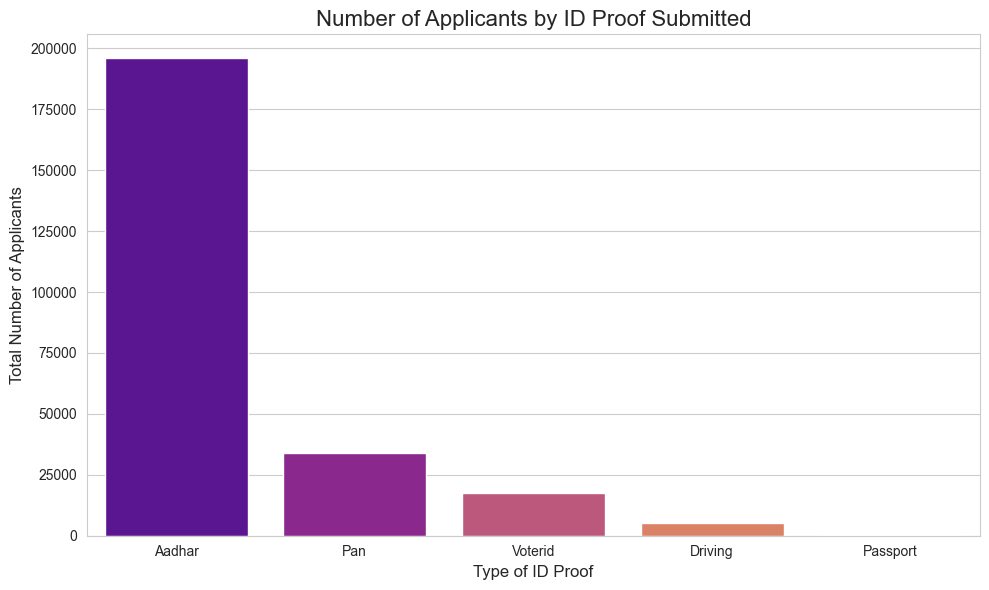

In [8]:
# --- ID Proof Analysis ---
# The ID columns are flags (1 = submitted, 0 = not submitted)
id_flags = ['aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag']
id_counts = df[id_flags].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=id_counts.index, y=id_counts.values, palette='plasma')
plt.title('Number of Applicants by ID Proof Submitted', fontsize=16)
plt.xlabel('Type of ID Proof', fontsize=12)
plt.ylabel('Total Number of Applicants', fontsize=12)
plt.xticks(ticks=range(len(id_flags)), labels=[flag.replace('_flag', '').title() for flag in id_flags])
plt.tight_layout()

# --- SAVE THE FIGURE ---
plt.savefig('../reports/figures/id_proof_counts.png', bbox_inches='tight')

plt.show()
